### Sentiment Datasets
* `sentiment140` ([paper](https://www-cs.stanford.edu/people/alecmgo/papers/TwitterDistantSupervision09.pdf), [data](https://huggingface.co/datasets/sentiment140), 2009) - 1.6million tweets labeled 0-4 on sentiment AND entity/query of interest(!!)
* `twitter-financial-news-sentiment` ([paper](https://neuralmagic.com/blog/classifying-finance-tweets-in-real-time-with-sparse-transformers/), [data](https://huggingface.co/datasets/zeroshot/twitter-financial-news-sentiment), ??) - 12k tweets labeled 0-2 on sentiment for financial entities
* `mteb/tweet-sentiment-extraction` ([paper](https://www.kaggle.com/competitions/tweet-sentiment-extraction), [data](https://huggingface.co/datasets/mteb/tweet_sentiment_extraction), ??) - 30k tweets with sentiment (0-2)
* `mteb/amazon_polarity` ([paper](https://dl.acm.org/doi/10.1145/2507157.2507163), [data](https://huggingface.co/datasets/mteb/amazon_polarity), 2013) - 4M Amazon reviews of various products with sentiment labeled 0-1
* `mteb/amazon_reviews` ([paper](https://dl.acm.org/doi/10.1145/2507157.2507163), [data](https://huggingface.co/datasets/mteb/amazon_reviews_multi), 2013) - 1.2M Amazon reviews of various products with sentiment labeled 0-4 (multiple languages, 210k examples each)
* `mteb/imdb` ([paper](Maas et al), [data](https://huggingface.co/datasets/mteb/imdb), 2011) - IMDB reviews of various movies with sentiment labeled 0-1
* amazon_us_reviews - contains product, but unfortunately no longer available


In [1]:
from datasets import load_dataset

dataset = load_dataset("trivia_qa", "rc", streaming=True)

/home/kevin/mambaforge/envs/measurelm2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using the latest cached version of the module from /home/kevin/.cache/huggingface/modules/datasets_modules/datasets/trivia_qa/ee76d8a9403e71177e2a3fa7e414d1ee28a79a0970d9176f62f268798aa64b31 (last modified on Fri Nov 24 16:44:19 2023) since it couldn't be found locally at trivia_qa., or remotely on the Hugging Face Hub.


In [2]:
# for i in dataset["train"].iter(10):
#     print(i)

In [3]:
import yaml
with open('toy_movie_reviews.yaml', 'r') as file:
    review_adjs = yaml.safe_load(file)

In [4]:
pos_adjs_train = review_adjs["positive_adjectives_train"]
neg_adjs_train = review_adjs["negative_adjectives_train"]

pos_verbs = review_adjs["positive_verbs"]
neg_verbs = review_adjs["negative_verbs"]


In [5]:
from itertools import product
import pandas as pd
movies = pd.read_csv("movies_metadata.csv") # https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset?select=movies_metadata.csv
movies = movies[["title", "vote_count", "popularity"]].dropna().sort_values(by="vote_count")
movies["popularity"] = movies["popularity"].astype(float)
movies_sample = pd.concat([movies.iloc[:250], movies.iloc[-250:]], axis=0)

/tmp/ipykernel_29502/304678045.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv("movies_metadata.csv") # https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset?select=movies_metadata.csv


In [6]:
movies_sample

,title,vote_count,popularity
45416,"Whiffles, Cubic Artist",0.0,0.003732
45377,Simbad e il califfo di Bagdad,0.0,0.006352
107,Headless Body in Topless Bar,0.0,0.001346
126,Jupiter's Wife,0.0,0.001178
132,Sonic Outlaws,0.0,0.001838
...,...,...,...
26564,Deadpool,11444.0,187.860492
17818,The Avengers,12000.0,89.887648
14551,Avatar,12114.0,185.070892
12481,The Dark Knight,12269.0,123.167259


<Axes: xlabel='vote_count', ylabel='popularity'>

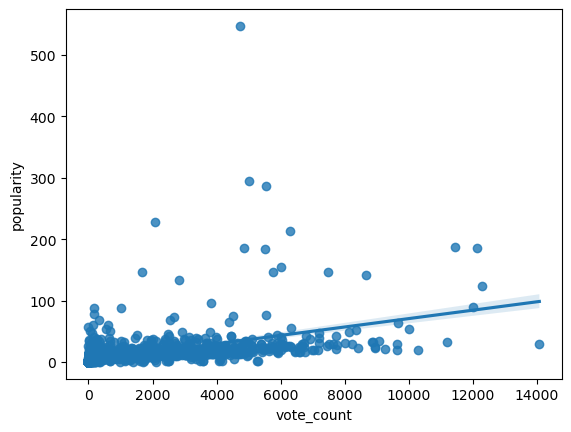

In [7]:
# WHETHER TO USE VOTE COUNT OR POPULARITY

# movies.sort_values(by="popularity").tail(50)
# movies.sort_values(by="vote_count").tail(50)
import seaborn as sns
sns.regplot(data=movies, x="vote_count", y="popularity")

In [8]:
template = "Here's a review for the movie '{}': I thought this movie was {}, I {} it.\nConclusion: This movie is"
template.format(movies_sample["title"].iloc[0], pos_adjs_train[0], pos_verbs[0])
movies_sample["sentence"] = movies_sample["title"].apply(lambda title: template.format(title, pos_adjs_train[0], pos_verbs[0])) 


In [9]:
context_template = "Here's a movie review: 'The movie was {} and I {} it'. "
num_adjs = min(len(pos_adjs_train), len(neg_adjs_train))
num_verbs = min(len(pos_verbs), len(neg_verbs))

pos_contexts = [context_template.format(adj, verb) for (adj, verb) in product(pos_adjs_train[:num_adjs], pos_verbs[:num_verbs])]
neg_contexts = [context_template.format(adj, verb) for (adj, verb) in product(neg_adjs_train[:num_adjs], neg_verbs[:num_verbs])]
contexts = pos_contexts + neg_contexts

print("Number of positive contexts: ", len(pos_contexts))
print("Number of negative contexts: ", len(neg_contexts))
print(contexts[::10])

Number of positive contexts:  72
Number of negative contexts:  72
["Here's a movie review: 'The movie was perfect and I enjoyed it'. ", "Here's a movie review: 'The movie was cheerful and I loved it'. ", "Here's a movie review: 'The movie was satisfactory and I liked it'. ", "Here's a movie review: 'The movie was outstanding and I enjoyed it'. ", "Here's a movie review: 'The movie was exceptional and I loved it'. ", "Here's a movie review: 'The movie was extraordinary and I liked it'. ", "Here's a movie review: 'The movie was brilliant and I enjoyed it'. ", "Here's a movie review: 'The movie was superb and I loved it'. ", "Here's a movie review: 'The movie was dull and I despised it'. ", "Here's a movie review: 'The movie was nasty and I hated it'. ", "Here's a movie review: 'The movie was terrible and I disliked it'. ", "Here's a movie review: 'The movie was disastrous and I despised it'. ", "Here's a movie review: 'The movie was frustrating and I hated it'. ", "Here's a movie review:

In [10]:
def format_query(query, entity, context, prefix=""):
    return prefix + context + query.format(entity)

In [11]:
# from functools import partial
# def fill_in_template(template: str, title: str, adj: str, verb: str):
#     return template.format(title, adj, verb)

# pos_template_partial = partial(fill_in_template, template=template, verb=pos_verbs[0])
# neg_template_partial = partial(fill_in_template, template=template, verb=neg_verbs[0])

# for adj in pos_adjs_train:
#     movies_sample[f"pos_{adj}_context"] = movies_sample["title"].apply(lambda title: pos_template_partial(title=title, adj=adj))

# for adj in neg_adjs_train:
#     movies_sample[f"neg_{adj}_context"] = movies_sample["title"].apply(lambda title: neg_template_partial(title=title, adj=adj))

In [12]:
movies_sample.head()

,title,vote_count,popularity,sentence
45416,"Whiffles, Cubic Artist",0.0,0.003732,"Here's a review for the movie 'Whiffles, Cubic..."
45377,Simbad e il califfo di Bagdad,0.0,0.006352,Here's a review for the movie 'Simbad e il cal...
107,Headless Body in Topless Bar,0.0,0.001346,Here's a review for the movie 'Headless Body i...
126,Jupiter's Wife,0.0,0.001178,Here's a review for the movie 'Jupiter's Wife'...
132,Sonic Outlaws,0.0,0.001838,Here's a review for the movie 'Sonic Outlaws':...


In [13]:
from transformers import GPTNeoXForCausalLM, AutoTokenizer
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
model_name = "EleutherAI/pythia-70m-deduped"


model = GPTNeoXForCausalLM.from_pretrained(
  model_name,
  # load_in_8bit=True,
  # revision="step3000",
  # cache_dir="./pythia-70m-deduped/step3000",
).to(device)

tokenizer = AutoTokenizer.from_pretrained(
  model_name,
  padding_side="left",
  # revision="step3000",
  # cache_dir="./pythia-70m-deduped/step3000",
)

query = "On a scale from 1 to 5 stars, the quality of this movie, '{}', is rated "
inputs = tokenizer(format_query(query=query, entity=movies_sample.iloc[0]["title"], context=contexts[0]), return_tensors="pt").to(device)
# inputs = tokenizer(movies_sample.iloc[0]["sentence"], return_tensors="pt").to(device)
tokens = model.generate(**inputs)
probs, top_tokens = torch.topk(torch.nn.functional.softmax(model(**inputs).logits[0, -1]), k=10)
print(sum(probs))
tokenizer.decode(top_tokens)
# print(tokens)
# tokenizer.decode(tokens[0])


/home/kevin/mambaforge/envs/measurelm2/lib/python3.10/site-packages/torch/cuda/__init__.py:107: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /home/conda/feedstock_root/build_artifacts/pytorch-recipe_1696770056690/work/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
/home/kevin/mambaforge/envs/measurelm2/lib/python3.10/site-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/home/kevin/mambaforge/envs/measurelm2/lib/python3.10/site-packages/transformers/generation/utils.py:1281: UserWarning: Input 

tensor(0.6466, grad_fn=<AddBackward0>)


/tmp/ipykernel_29502/1443869646.py:26: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs, top_tokens = torch.topk(torch.nn.functional.softmax(model(**inputs).logits[0, -1]), k=10)


'\n��iced001icky........icing�002'

In [14]:
# 1. Approximate x ∈ Σ∗ with a set of contexts from a dataset
# 2. Approximate p(y|x, q[e]) with monte carlo samples of y given x and q[e].
# 3. Approximate p(y|q[e]) with monte carlo samples of x.
# 4. Approximate p(x) with samples from a corpus (empirical distribution), but meaning/interpretation is complicated.
# Run a model on each of these sentences and get a score
from typing import List
import numpy as np
import math

def estimate_prob_x_given_e(entity: str, contexts: List[str]):
    """
    Returns a (len(contexts),) nparray containing the probability of each context.
    """
    return np.ones(len(contexts)) / len(contexts) 

def estimate_prob_next_word_given_x_and_entity(query, entity: str, contexts: List[str], model: GPTNeoXForCausalLM, tokenizer: AutoTokenizer, bs=32):
    """
    Args:
        entity: str - the entity of interest
        contexts: List[str] - list of contexts appended to the query regarding entity

    Returns:
      samples - a list of torch longtensors of shape (num_samples, max_length) with length len(contexts)
      possible_outputs - a dict mapping from all observed outputs to its unique index.
    """
    complete_queries = [format_query(query, entity, context) for context in contexts]

    if tokenizer.padding_side != "left":
        raise ValueError(f"Expected tokenizer {tokenizer} to have padding side of `left` for batch generation, instead has padding side of `{tokenizer.padding_side}`. Please make sure you initialize the tokenizer to use left padding.")
    
    if tokenizer.pad_token is None:
      tokenizer.pad_token = tokenizer.eos_token

    if model.config.pad_token_id != model.config.eos_token_id:
      print("Setting model.config.pad_token_id to model.config.eos_token_id")
      model.config.pad_token_id = model.config.eos_token_id


    num_batches = math.ceil(len(complete_queries) / bs)
    last_word_logits = torch.zeros(len(complete_queries), model.config.vocab_size, device=model.device)
    for b in range(num_batches):
        start, end = b * bs, min((b + 1) * bs, len(complete_queries))
        tokens = tokenizer(complete_queries[start: end], padding=True, return_tensors="pt").to(model.device) # shape: (len(contexts), max_context_width)
        logits = model(**tokens)["logits"] # shape: (len(contexts), mcw, vocab_sz)
        last_word_logits_batch = logits[:, -1, :] # shape: (len(contexts), vocab_sz)
        last_word_logits[start: end] = last_word_logits_batch

    last_word_probs = torch.nn.functional.softmax(last_word_logits, dim=1) # shape: (len(contexts, vocab_sz))
    # print(last_word_probs.shape)
    # print(torch.sum(last_word_probs, dim=1)[1].item())

    return last_word_probs.cpu().detach().numpy()

def estimate_prob_y_given_context_and_entity(
        query:str, 
        entity: str, 
        contexts: List[str], 
        model: GPTNeoXForCausalLM, 
        tokenizer: AutoTokenizer, 
        num_samples=None,
        max_output_length=1,
    ):
    """
    Args:
        output_samples - a list of sampled outputs from the model given the context and entity. 
                         Outputs need not be unique.

    Returns:
        a (len(set(output_samples)),) nparray containing the probability of each output.
    """
    if max_output_length > 1 and num_samples is None:
        raise ValueError("Estimating p(y | x, q[e]) for outputs y with length >1 requires sampling. Please specify a value for num_samples.")

    if num_samples is not None:
        return sample_y_given_x_and_entity(
            query=query, 
            entity=entity, 
            contexts=contexts, 
            model=model, 
            tokenizer=tokenizer, 
            num_samples=num_samples,
            max_output_length=max_output_length,
        )

    return estimate_prob_next_word_given_x_and_entity(            
        query=query, 
        entity=entity, 
        contexts=contexts, 
        model=model, 
        tokenizer=tokenizer, 
    )
    

def sample_y_given_x_and_entity(query, entity: str, contexts: List[str], model: GPTNeoXForCausalLM, tokenizer: AutoTokenizer, num_samples=1000):
    """
    Args:
        entity: str - the entity of interest
        contexts: List[str] - list of contexts appended to the query regarding entity
    """
    raise NotImplementedError()


def estimate_cmi(query, entity, contexts, model, tokenizer): 
    """
    Computes the conditional mutual information I(X; Y | q[e]) of answer Y and context X when conditioned on query regarding entity e.

    I(X; Y | q[e]) = \sum_{x \in X} \sum_{y \in Y} (p(x, y | q[e]) * log(p(y | x, q[e]) / p(y | q[e])))

    So we need to monte carlo estimate:
        (1) p(y | x, q[e])                                             , shape: (|X|, |Y|)
        (2) p(x | q[e])                                                , shape: (|X|,)
        (3) p(x, y | q[e]) = p(y | x, q[e]) * p(x | q[e])              , shape: (|X|, |Y|)
        (4) p(y | q[e]) = \sum_{x \in X} (p(y | x, q[e]) * p(x | q[e])), shape: (|Y|,)
    """
    prob_x_given_e = estimate_prob_x_given_e(entity, contexts) # shape: (|X|,)
    # output_samples = sample_y_given_x_and_entity(query, entity, contexts, model, tokenizer) # shape: (|X|,)
    prob_y_given_context_and_entity = estimate_prob_y_given_context_and_entity(query, entity, contexts, model, tokenizer) # shape: (|X|, |Y|)

    prob_x_y_given_e = np.einsum("ij, i -> ij", prob_y_given_context_and_entity, prob_x_given_e) # shape: (|X|, |Y|)
    prob_y_given_e = np.einsum("ij, i -> j", prob_y_given_context_and_entity, prob_x_given_e) # shape: (|Y|,)
    
    return np.sum(prob_x_y_given_e * np.nan_to_num(np.log(prob_y_given_context_and_entity / prob_y_given_e)))

In [15]:
query = "On a scale from 1 to 5 stars, the quality of this movie, '{}', is rated "
from tqdm import tqdm
tqdm.pandas()
movies_sample["susceptibility_score"] = movies_sample["title"].progress_apply(lambda e: estimate_cmi(query=query, entity=e, contexts=contexts, model=model, tokenizer=tokenizer))

  0%|          | 0/500 [00:00<?, ?it/s]

Setting model.config.pad_token_id to model.config.eos_token_id


In [ ]:
movies_sample.value_counts("susceptibility_score")

susceptibility_score
0.007402    2
0.005801    1
0.005799    1
0.005785    1
0.005782    1
           ..
0.005150    1
0.005146    1
0.005144    1
0.005141    1
0.005192    1
Name: count, Length: 499, dtype: int64

In [ ]:
movies_sample

,title,vote_count,popularity,sentence,susceptibility_score
45416,"Whiffles, Cubic Artist",0.0,0.003732,"Here's a review for the movie 'Whiffles, Cubic...",0.005601
45377,Simbad e il califfo di Bagdad,0.0,0.006352,Here's a review for the movie 'Simbad e il cal...,0.007200
107,Headless Body in Topless Bar,0.0,0.001346,Here's a review for the movie 'Headless Body i...,0.005221
126,Jupiter's Wife,0.0,0.001178,Here's a review for the movie 'Jupiter's Wife'...,0.006742
132,Sonic Outlaws,0.0,0.001838,Here's a review for the movie 'Sonic Outlaws':...,0.005031
...,...,...,...,...,...
26564,Deadpool,11444.0,187.860492,Here's a review for the movie 'Deadpool': I th...,0.006200
17818,The Avengers,12000.0,89.887648,Here's a review for the movie 'The Avengers': ...,0.007198
14551,Avatar,12114.0,185.070892,Here's a review for the movie 'Avatar': I thou...,0.005439
12481,The Dark Knight,12269.0,123.167259,Here's a review for the movie 'The Dark Knight...,0.005530


<Axes: xlabel='vote_count', ylabel='susceptibility_score'>

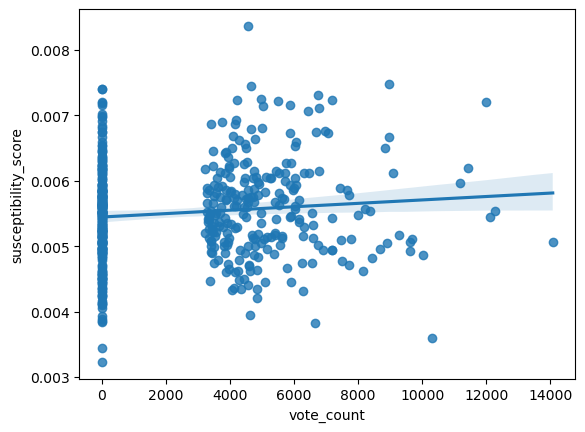

In [ ]:
sns.regplot(data=movies_sample, x="vote_count", y="susceptibility_score")